<a href="https://colab.research.google.com/github/sai14karthik/DIP/blob/main/AP21110010310_DIP_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIP Lab Assignment 3

# N.Sai Karthik (AP21110010310) CSE-E

Create black and white images (A) of size 1024x1024. Which consists of alternative horizontal lines of black and white? Each line is of size 128

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lena_image = cv2.imread('/content/Lenna_(test_image).png')
lena_image = cv2.resize(lena_image, (1024, 1024))

In [3]:
line_thickness = 128
pattern = np.zeros((1024, 1024), dtype=np.uint8)

In [6]:
lena_gray = cv2.cvtColor(lena_image, cv2.COLOR_BGR2GRAY)


In [4]:
for i in range(0, 1024, line_thickness * 2):
    pattern[i:i + line_thickness] = 255

In [7]:
combined_image = np.where(pattern == 255, 255, lena_gray)


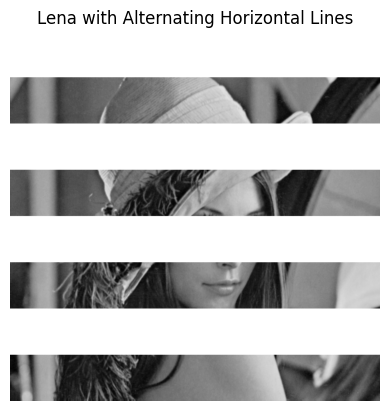

In [8]:
plt.imshow(combined_image, cmap='gray')
plt.title('Lena with Alternating Horizontal Lines')
plt.axis('off')
plt.show()


In [9]:
cv2.imwrite('lena_with_lines.png', combined_image)


True

Create black and white images (B) of size 1024x1024. Which consists of alternative vertical lines of black and white? Each line is of size128.

In [14]:
lena_image = cv2.imread('/content/Lenna_(test_image).png')
lena_image = cv2.resize(lena_image, (1024, 1024))

In [15]:
line_thickness = 128
pattern = np.zeros((1024, 1024), dtype=np.uint8)

In [16]:
for i in range(0, 1024, line_thickness * 2):
    pattern[:, i:i + line_thickness] = 255

In [17]:
lena_gray = cv2.cvtColor(lena_image, cv2.COLOR_BGR2GRAY)


In [18]:
combined_image = np.where(pattern == 255, 255, lena_gray)


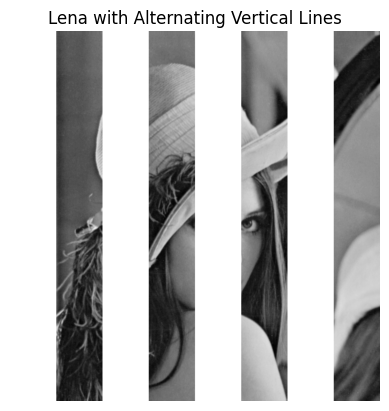

In [19]:
plt.imshow(combined_image, cmap='gray')
plt.title('Lena with Alternating Vertical Lines')
plt.axis('off')
plt.show()
